In [1]:
import tensorflow as tf

import tensorflow.keras.layers as layers
import numpy as np


D:\ML_AI\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X = np.concatenate((x_train, x_test), axis=0)
x_orig = X.copy()
X = X / 255.0
y = np.concatenate((y_train, y_test), axis=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)

In [3]:
model_load = tf.keras.models.load_model('ACC0906-models.keras')
loss, accuracy = model_load.evaluate(X_test, Y_test)
print(f"Dokładność modelu: {accuracy:.2f}")

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.9067 - loss: 0.3978
Dokładność modelu: 0.91


In [4]:
model = tf.keras.Sequential([
  layers.Input(shape=(28,28,1)),

    layers.Conv2D(32, 3, activation='relu'),
    #layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    #layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    #rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True
)
reshp_x_train = X_train.reshape(-1, 28, 28, 1)
reshp_x_test = X_test.reshape(-1, 28, 28, 1)
datagen.fit(reshp_x_train)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
train_stats_aug = model.fit(
    datagen.flow(reshp_x_train, Y_train, batch_size=128),
    verbose=1,
    epochs=70,
    batch_size=128,
    validation_data=(reshp_x_test, Y_test)
)

Epoch 1/70
493/493 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8146 - loss: 0.5077 - val_accuracy: 0.8754 - val_loss: 0.3370
Epoch 2/70
493/493 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8699 - loss: 0.3501 - val_accuracy: 0.8997 - val_loss: 0.2754
Epoch 3/70
493/493 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.8885 - loss: 0.3046 - val_accuracy: 0.9041 - val_loss: 0.2606
Epoch 4/70
493/493 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.8977 - loss: 0.2748 - val_accuracy: 0.9100 - val_loss: 0.2511
Epoch 5/70
493/493 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9047 - loss: 0.2586 - val_accuracy: 0.9109 - val_loss: 0.2437
Epoch 6/70
493/493 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9101 - loss: 0.2402 - val_accuracy: 0.9179 - val_loss: 0.2330
Epoch 7/70
493/493 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9153 - loss: 0.2277 - val_accuracy: 0.9247 - val_loss: 0.2223
Epoch 8/70
493/493 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9205 - loss: 0.2165 - 

In [7]:
loss, accuracy = model.evaluate(reshp_x_test, Y_test)
print(f"Dokładność modelu: {accuracy:.2f}")

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9363 - loss: 0.2843
Dokładność modelu: 0.94


In [8]:
name =f"AUG_ACC%s-models.keras"%str(accuracy)[0:5].replace('.', '')
model.save(name)

# Rosnące accuracy i utrzymujący się VAL_LOSS sugerują, że jakby jeszcze potrenować to były by lepiej

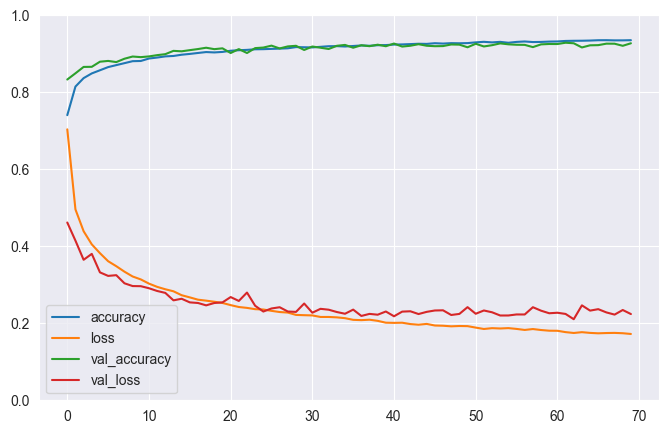

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(train_stats_aug.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [43]:
epochs=30
batch_size=128
train_stats = model.fit(
    reshp_x_train,
    Y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    verbose=1
)

Epoch 1/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8013 - loss: 0.5550 - val_accuracy: 0.8635 - val_loss: 0.3853
Epoch 2/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8701 - loss: 0.3616 - val_accuracy: 0.8773 - val_loss: 0.3413
Epoch 3/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8869 - loss: 0.3129 - val_accuracy: 0.8932 - val_loss: 0.2936
Epoch 4/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8970 - loss: 0.2819 - val_accuracy: 0.8984 - val_loss: 0.2862
Epoch 5/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9047 - loss: 0.2586 - val_accuracy: 0.8973 - val_loss: 0.2773
Epoch 6/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9119 - loss: 0.2412 - val_accuracy: 0.9037 - val_loss: 0.2601
Epoch 7/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9192 - loss: 0.2219 - val_accuracy: 0.9052 - val_loss: 0.2503
Epoch 8/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9234 - loss: 0.2069 - val_accuracy: 0.

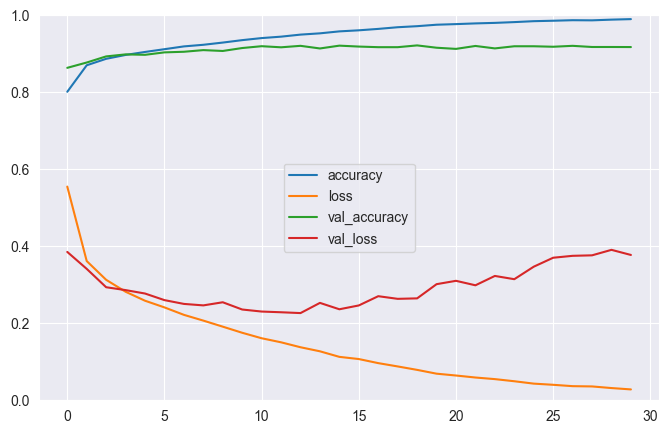

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(train_stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [45]:
loss, accuracy = model.evaluate(reshp_x_test, Y_test)
print(f"Dokładność modelu: {accuracy:.2f}")

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9206 - loss: 0.4064
Dokładność modelu: 0.92


# Rosnący do 15 epoki VAL_LOSS sugeruje, że model się przeuczył